## Fundamentals Notebook
In this notebook, a quick overview of the functionalities of the data augmentation library is provided. All the functionalities detailed here can also be called using the API interface.

In [1]:
import os
os.chdir("..")

print(os.getcwd())

/home/albert/Projects/policy-based-data-augmentation


In [3]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

from src.main import augment_data

import matplotlib.pyplot as plt

This code snippet loads a a toy dataset (Breast Cancer dataset) from the scikit-learn library, converting it into a Pandas DataFrame, and making some modifications to the DataFrame

In [4]:
target_feature = 'label'
breast_cancer = load_breast_cancer()

# Create a DataFrame with standardized column names
data = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
data[target_feature] = breast_cancer.target
# Rename columns by replacing spaces with underscores
data.columns = data.columns.str.replace(' ', '_')

In [5]:
# The following function allows to generate a simple classification algorithm 
# and output a metric to benchamark the different augmentations 

def classification_model(x_data, y_data): 
    # Train a classification model and return the F-score.
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
    model = DecisionTreeClassifier()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)

    return report['weighted avg']['f1-score']

In [6]:
# augment_data allows to generate syntetic samples according 
# At this point, the user needs to define the target variable to select the minority class.
# The model type expects the following information: SMOTE, ADASYN, or CTGAN; otherwise, an error is raised
new_samples = augment_data(data, target_feature, "SMOTE", 10, True)
new_samples.head(1) # Example of a data augmentated

INFO:src.main:Applying DA using SMOTE, Original Samples: 569 - Generated Samples 10


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,label
0,17.558603,24.146107,116.49758,990.893119,0.103733,0.154473,0.204177,0.100858,0.156708,0.062942,...,31.799515,155.061452,1653.865913,0.13835,0.368755,0.476436,0.174497,0.226258,0.091941,0


In [7]:
def benchmark_data_augmentation(data: object, da_strategy: str) -> dict:
    observed_fscore = {}
    for i in range(0, 100, 5): 

        if i == 0: 
            y_data = data[target_feature]
            x_data = data.drop(columns=[target_feature])
        else: 
            n_samples_augmented = int((data.shape[0]/100)*i) # The i% are DA samples
            new_samples = augment_data(data, target_feature, da_strategy, n_samples_augmented, True)

            new_dataset = pd.concat([data, new_samples], ignore_index=True)
            y_data = new_dataset[target_feature]
            x_data = new_dataset.drop(columns=[target_feature])

        observed_fscore[i] = classification_model(x_data, y_data)
    
    return observed_fscore

def plot_observed_fscore(observed_fscore:dict): 
    plt.plot(observed_fscore.keys(), observed_fscore.values(), marker='o', linestyle='-')
    plt.title('Observed F-score vs Percentage of Augmented Data')
    plt.xlabel('Percentage of Augmented Data')
    plt.ylabel('Observed F-score')
    plt.grid(True)
    
    plt.show()

INFO:src.main:Applying DA using SMOTE, Original Samples: 569 - Generated Samples 28
INFO:src.main:Applying DA using SMOTE, Original Samples: 569 - Generated Samples 56
INFO:src.main:Applying DA using SMOTE, Original Samples: 569 - Generated Samples 85
INFO:src.main:Applying DA using SMOTE, Original Samples: 569 - Generated Samples 113
INFO:src.main:Applying DA using SMOTE, Original Samples: 569 - Generated Samples 142
INFO:src.main:Applying DA using SMOTE, Original Samples: 569 - Generated Samples 170
INFO:src.main:Applying DA using SMOTE, Original Samples: 569 - Generated Samples 199
INFO:src.main:Applying DA using SMOTE, Original Samples: 569 - Generated Samples 227
INFO:src.main:Applying DA using SMOTE, Original Samples: 569 - Generated Samples 256
INFO:src.main:Applying DA using SMOTE, Original Samples: 569 - Generated Samples 284
INFO:src.main:Applying DA using SMOTE, Original Samples: 569 - Generated Samples 312
INFO:src.main:Applying DA using SMOTE, Original Samples: 569 - Gener

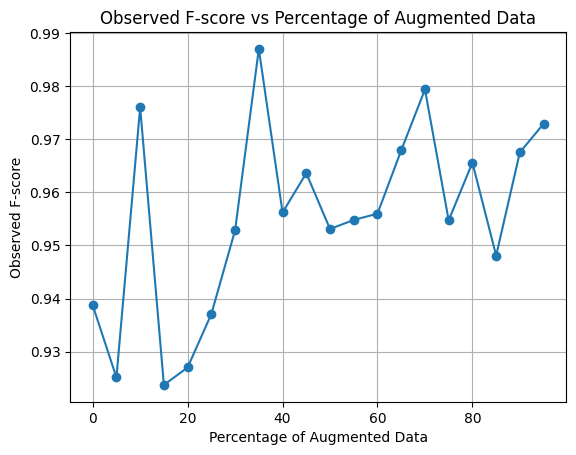

In [8]:
# Benchmark augmentation using SMOTE  
plot_observed_fscore(benchmark_data_augmentation(data, "SMOTE"))

INFO:src.main:Applying DA using ADASYN, Original Samples: 569 - Generated Samples 28
INFO:src.main:Applying DA using ADASYN, Original Samples: 569 - Generated Samples 56
INFO:src.main:Applying DA using ADASYN, Original Samples: 569 - Generated Samples 85
INFO:src.main:Applying DA using ADASYN, Original Samples: 569 - Generated Samples 113
INFO:src.main:Applying DA using ADASYN, Original Samples: 569 - Generated Samples 142
INFO:src.main:Applying DA using ADASYN, Original Samples: 569 - Generated Samples 170
INFO:src.main:Applying DA using ADASYN, Original Samples: 569 - Generated Samples 199
INFO:src.main:Applying DA using ADASYN, Original Samples: 569 - Generated Samples 227
INFO:src.main:Applying DA using ADASYN, Original Samples: 569 - Generated Samples 256
INFO:src.main:Applying DA using ADASYN, Original Samples: 569 - Generated Samples 284
INFO:src.main:Applying DA using ADASYN, Original Samples: 569 - Generated Samples 312
INFO:src.main:Applying DA using ADASYN, Original Samples:

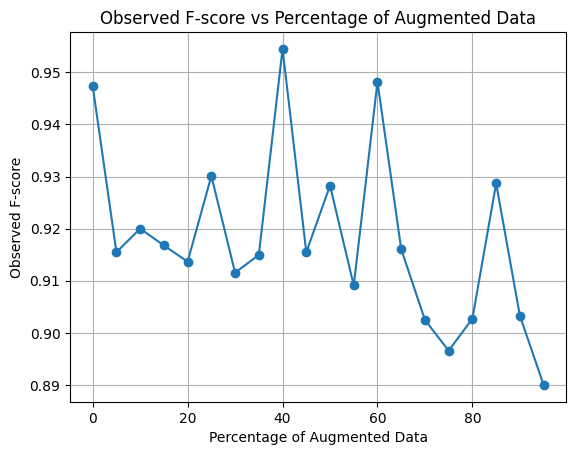

In [9]:
plot_observed_fscore(benchmark_data_augmentation(data, "ADASYN"))

INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_radius. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_texture. Extra column not created.


[DEBUG]: CTGAN label: 0


INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_perimeter. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_area. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_smoothness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_compactness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concavity. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concave_points. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_symmetry. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_fractal_dimension. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no miss

[DEBUG]: CTGAN label: 0


INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_area. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_smoothness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_compactness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concavity. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concave_points. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_symmetry. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_fractal_dimension. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column radius_error. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missin

[DEBUG]: CTGAN label: 0


INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_perimeter. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_area. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_smoothness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_compactness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concavity. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concave_points. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_symmetry. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_fractal_dimension. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no miss

[DEBUG]: CTGAN label: 0


INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_perimeter. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_area. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_smoothness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_compactness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concavity. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concave_points. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_symmetry. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_fractal_dimension. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no miss

[DEBUG]: CTGAN label: 0


INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_area. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_smoothness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_compactness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concavity. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concave_points. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_symmetry. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_fractal_dimension. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column radius_error. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missin

[DEBUG]: CTGAN label: 0


INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_area. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_smoothness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_compactness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concavity. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concave_points. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_symmetry. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_fractal_dimension. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column radius_error. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missin

[DEBUG]: CTGAN label: 0


INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_perimeter. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_area. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_smoothness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_compactness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concavity. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concave_points. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_symmetry. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_fractal_dimension. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no miss

[DEBUG]: CTGAN label: 0


INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_perimeter. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_area. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_smoothness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_compactness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concavity. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concave_points. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_symmetry. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_fractal_dimension. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no miss

[DEBUG]: CTGAN label: 0


INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_perimeter. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_area. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_smoothness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_compactness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concavity. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concave_points. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_symmetry. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_fractal_dimension. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no miss

[DEBUG]: CTGAN label: 0


INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_perimeter. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_area. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_smoothness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_compactness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concavity. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concave_points. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_symmetry. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_fractal_dimension. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no miss

[DEBUG]: CTGAN label: 0


INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_perimeter. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_area. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_smoothness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_compactness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concavity. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concave_points. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_symmetry. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_fractal_dimension. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no miss

[DEBUG]: CTGAN label: 0


INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_perimeter. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_area. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_smoothness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_compactness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concavity. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concave_points. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_symmetry. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_fractal_dimension. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no miss

[DEBUG]: CTGAN label: 0


INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_perimeter. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_area. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_smoothness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_compactness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concavity. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concave_points. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_symmetry. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_fractal_dimension. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no miss

[DEBUG]: CTGAN label: 0


INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_perimeter. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_area. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_smoothness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_compactness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concavity. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concave_points. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_symmetry. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_fractal_dimension. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no miss

[DEBUG]: CTGAN label: 0


INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_perimeter. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_area. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_smoothness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_compactness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concavity. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concave_points. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_symmetry. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_fractal_dimension. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no miss

[DEBUG]: CTGAN label: 0


INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_perimeter. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_area. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_smoothness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_compactness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concavity. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concave_points. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_symmetry. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_fractal_dimension. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no miss

[DEBUG]: CTGAN label: 0


INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_perimeter. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_area. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_smoothness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_compactness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concavity. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concave_points. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_symmetry. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_fractal_dimension. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no miss

[DEBUG]: CTGAN label: 0


INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_perimeter. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_area. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_smoothness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_compactness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concavity. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concave_points. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_symmetry. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_fractal_dimension. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no miss

[DEBUG]: CTGAN label: 0


INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_perimeter. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_area. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_smoothness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_compactness. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concavity. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_concave_points. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_symmetry. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column mean_fractal_dimension. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no miss

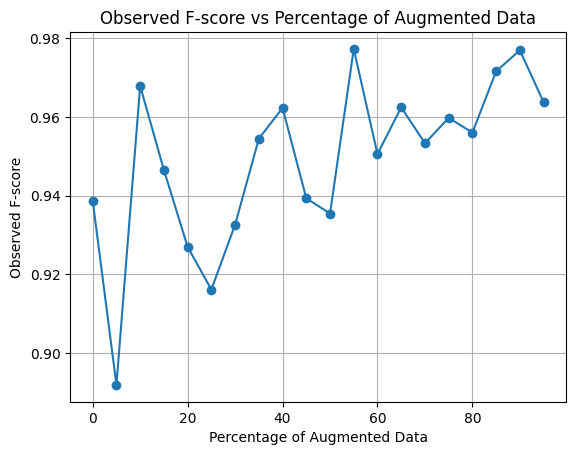

In [10]:
# The AUTO mode computes the three DA strategies and returns the one with better quality.
plot_observed_fscore(benchmark_data_augmentation(data, "AUTO"))